# Chebychev and cubic spline derivative approximation errors

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demapp06.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2022-Oct-23</i>
<hr>

## Initial tasks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from compecon import BasisChebyshev, BasisSpline, nodeunif


## Function to be  approximated

In [2]:
f = lambda x: np.exp(-x)
df = lambda x: -np.exp(-x)
d2f = lambda x: np.exp(-x)

Set degree of approximation and endpoints of approximation interval

In [3]:
a =  -1  # left endpoint
b =   1  # right endpoint
n =  10  # order of interpolatioin

Construct refined uniform grid for error ploting

In [4]:
x = np.linspace(a,b, 1001)

Construct Chebychev interpolant

In [5]:
C = BasisChebyshev(n, a, b, f=f)    

Construct cubic spline interpolant

In [6]:
S = BasisSpline(n, a, b, f=f)     

### Plot function approximation error

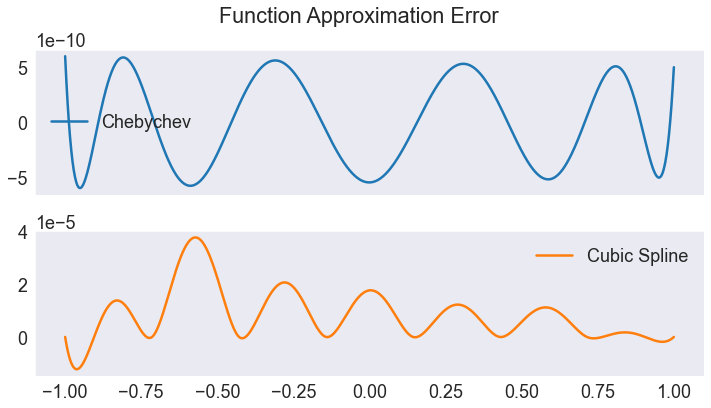

In [7]:
y = f(x)

fig1, axs = plt.subplots(2,1,sharex=True)
fig1.suptitle('Function Approximation Error') 

(pd.DataFrame({
    'Chebychev': y - C(x),
    'Cubic Spline': y - S(x)},
    index=x)
 .plot(subplots=True, ax=axs)
); 

### Plot first derivative approximation error

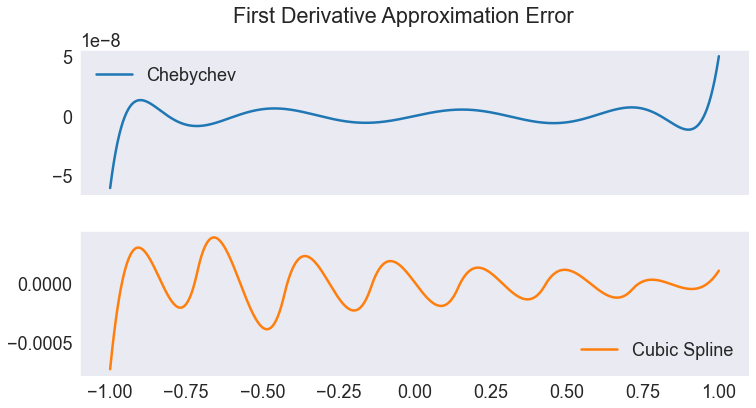

In [8]:
dy = df(x)

fig1, axs = plt.subplots(2,1,sharex=True)
fig1.suptitle('First Derivative Approximation Error') 

(pd.DataFrame({
    'Chebychev': dy - C(x, 1),
    'Cubic Spline': dy - S(x, 1)},
    index=x)
 .plot(subplots=True, ax=axs)
);

### Plot second derivative approximation error

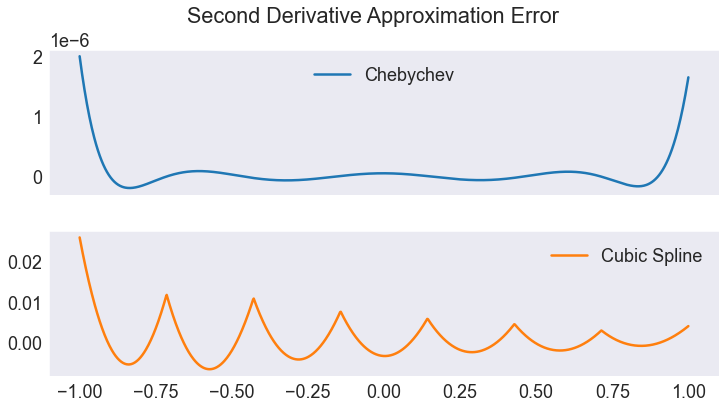

In [9]:
d2y = d2f(x)

fig1, axs = plt.subplots(2,1,sharex=True)
fig1.suptitle('Second Derivative Approximation Error') 

(pd.DataFrame({
    'Chebychev': d2y - C(x, 2),
    'Cubic Spline': d2y - S(x, 2)},
    index=x)
 .plot(subplots=True, ax=axs)
);